<a href="https://colab.research.google.com/github/zuls/WSI/blob/main/WSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get update -qq
!apt-get install -y openslide-tools
!pip install openslide-python

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openslide-tools is already the newest version (3.4.1+dfsg-5build1).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [3]:
import openslide
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

import numpy as np
import matplotlib.pyplot as plt

# --- Resources for Free Whole Slide Image Samples ---
# 1. OpenSlide Test Data: This is a good starting point for small, manageable test images.
#    You can find several `.svs` files here: https://openslide.cs.cmu.edu/download/openslide-testdata/
#    For example, `CMU-1.svs` is a common choice.
#    To download in Colab, you could use: `!wget https://openslide.cs.cmu.edu/download/openslide-testdata/openslide-testdata-standard/CMU-1.svs`

# 2. The Cancer Imaging Archive (TCIA): Offers large collections of medical images, including WSIs.
#    Website: https://www.cancerimagingarchive.net/
#    You'll need to navigate their datasets to find specific WSI collections.

# 3. Publicly available datasets from research institutions or competitions (e.g., Kaggle).
#    Search for 'WSI datasets' or 'whole slide imaging datasets' on platforms like Kaggle or Google Dataset Search.

# Once you download a file (e.g., 'sample.svs'), you can then open it like this:
# slide = openslide.open_slide('path/to/your/sample.svs')

In [4]:
!wget https://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1.svs

--2025-11-23 20:17:40--  https://openslide.cs.cmu.edu/download/openslide-testdata/Aperio/CMU-1.svs
Resolving openslide.cs.cmu.edu (openslide.cs.cmu.edu)... 128.2.209.93
Connecting to openslide.cs.cmu.edu (openslide.cs.cmu.edu)|128.2.209.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177552579 (169M) [image/tiff]
Saving to: ‘CMU-1.svs.1’

CMU-1.svs.1         100%[===================>] 169.33M  11.6MB/s    in 21s     

2025-11-23 20:18:02 (8.22 MB/s) - ‘CMU-1.svs.1’ saved [177552579/177552579]



In [5]:
slide = openslide.open_slide('CMU-1.svs')

In [6]:
slide.dimensions

(46000, 32914)

(np.float64(-0.5), np.float64(499.5), np.float64(357.5), np.float64(-0.5))

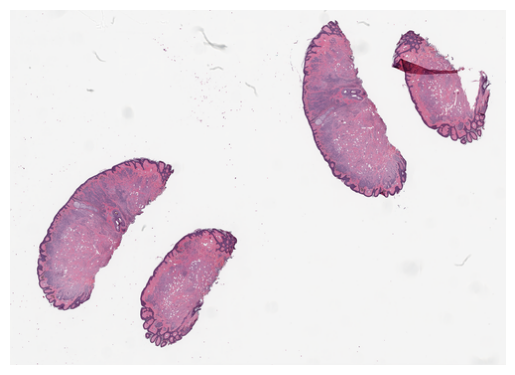

In [8]:
thumbnail = slide.get_thumbnail((500, 500))
plt.imshow(thumbnail)
plt.axis('off')
#plt.title(f"Thumbnail (Max 500x500) of {slide.dimensions[0]}x{slide.dimensions[1]} image")

In [9]:
slide = open_slide('CMU-1.svs')


In [10]:
slide.detect_format('CMU-1.svs')

'aperio'

In [11]:
slide.level_count

3

In [12]:
slide.dimensions

(46000, 32914)

In [13]:
slide.level_dimensions

((46000, 32914), (11500, 8228), (2875, 2057))

In [14]:
slide.level_downsamples

(1.0, 4.000121536217793, 16.00048614487117)

In [18]:
slide = openslide.open_slide('CMU-1.svs')
slide_props = slide.properties
slide_props

<_PropertyMap {'aperio.AppMag': '20', 'aperio.Date': '12/29/09', 'aperio.Filename': 'CMU-1', 'aperio.Filtered': '5', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '1004486', 'aperio.Left': '25.691574', 'aperio.LineAreaXOffset': '0.019265', 'aperio.LineAreaYOffset': '-0.000313', 'aperio.LineCameraSkew': '-0.000424', 'aperio.MPP': '0.4990', 'aperio.OriginalWidth': '46920', 'aperio.Originalheight': '33014', 'aperio.Parmset': 'USM Filter', 'aperio.ScanScope ID': 'CPAPERIOCS', 'aperio.StripeWidth': '2040', 'aperio.Time': '09:59:15', 'aperio.Top': '23.449873', 'aperio.User': 'b414003d-95c6-48b0-9369-8010ed517ba7', 'openslide.comment': 'Aperio Image Library v10.0.51\r\n46920x33014 [0,100 46000x32914] (256x256) JPEG/RGB Q=30|AppMag = 20|StripeWidth = 2040|ScanScope ID = CPAPERIOCS|Filename = CMU-1|Date = 12/29/09|Time = 09:59:15|User = b414003d-95c6-48b0-9369-8010ed517ba7|Parmset = USM Filter|MPP = 0.4990|Left = 25.691574|Top = 23.449873|LineCameraS

In [19]:
slide_props['aperio.AppMag']

'20'

In [20]:
slide_props[openslide.PROPERTY_NAME_COMMENT]

'Aperio Image Library v10.0.51\r\n46920x33014 [0,100 46000x32914] (256x256) JPEG/RGB Q=30|AppMag = 20|StripeWidth = 2040|ScanScope ID = CPAPERIOCS|Filename = CMU-1|Date = 12/29/09|Time = 09:59:15|User = b414003d-95c6-48b0-9369-8010ed517ba7|Parmset = USM Filter|MPP = 0.4990|Left = 25.691574|Top = 23.449873|LineCameraSkew = -0.000424|LineAreaXOffset = 0.019265|LineAreaYOffset = -0.000313|Focus Offset = 0.000000|ImageID = 1004486|OriginalWidth = 46920|Originalheight = 33014|Filtered = 5|ICC Profile = ScanScope v1'

In [21]:
slide_props[openslide.PROPERTY_NAME_MPP_X]

'0.499'

In [22]:
slide_props[openslide.PROPERTY_NAME_MPP_Y]

'0.499'

In [23]:
thumbnail.size

(500, 358)

In [24]:
dims = slide.level_dimensions
dims

((46000, 32914), (11500, 8228), (2875, 2057))

In [26]:
level3_dim = dims[2]
level3_dim

(2875, 2057)

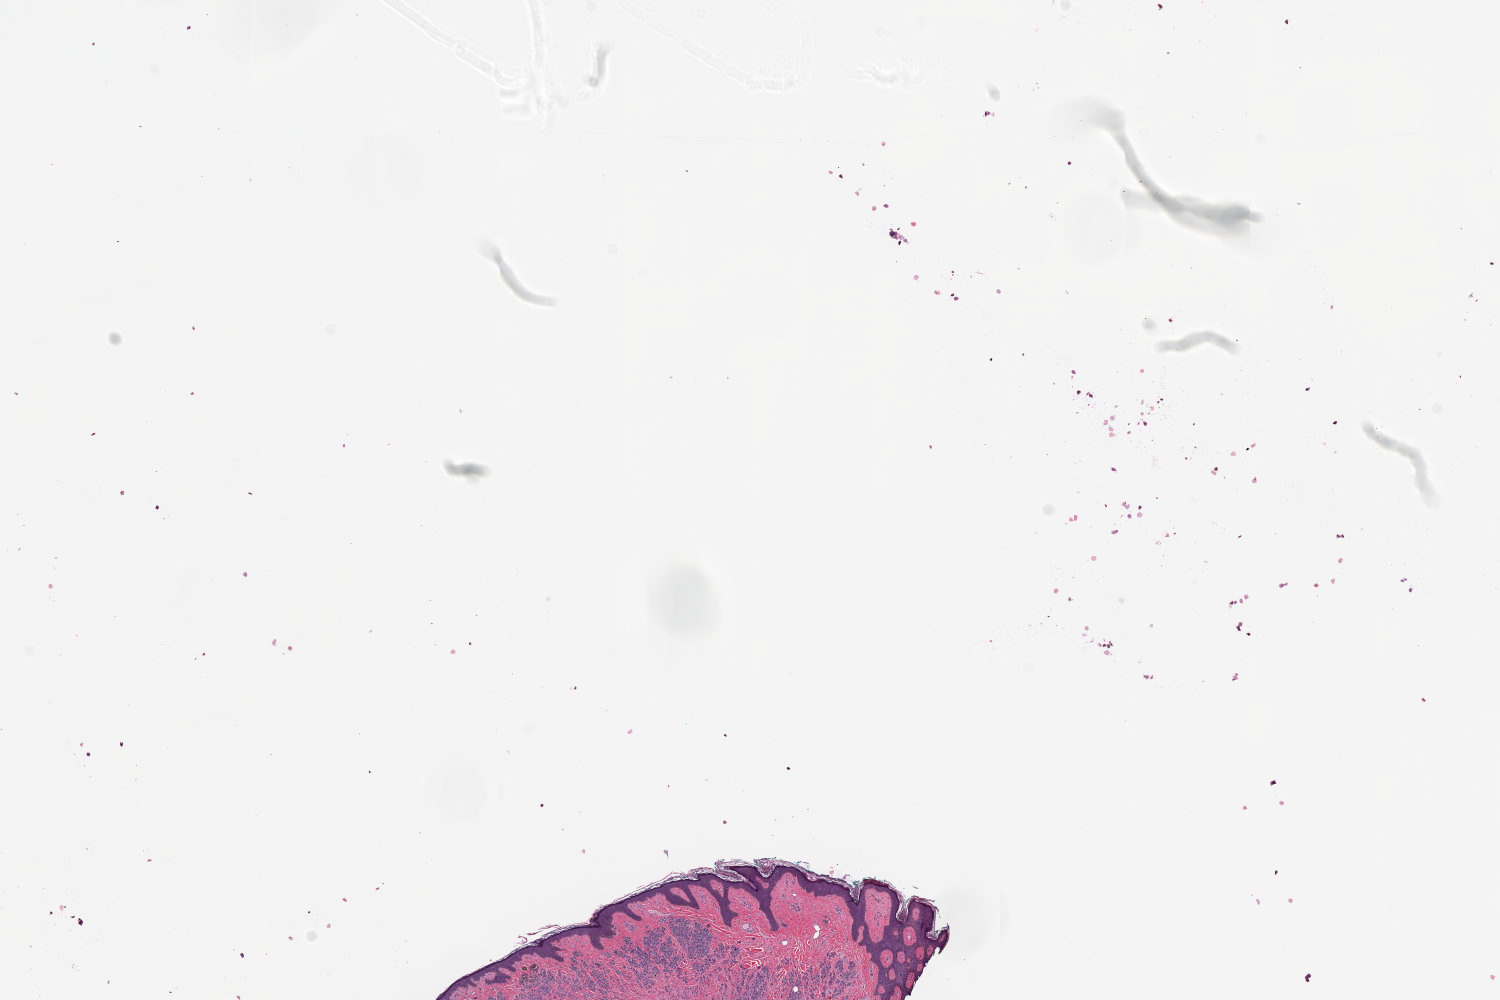

In [30]:
level3_img = slide.read_region((0, 0), 2, (1500, 1000))
level3_img